## CNN  en sepecifier une station

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

traite time serise data 

In [ ]:

file_path = 'merge_bikes_filtered_weather_data_filtered.csv'
data = pd.read_csv(file_path)

data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')
data['hour'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
data = data.set_index('timestamp')


grouped = data.groupby('number')
print(grouped.size())
group = grouped.get_group(44)  
print(group.head())
print(group.index)

number
1       2997
2       2997
3       2997
4       2997
5       2997
        ... 
398     2997
399     2997
400     2997
1031    2997
1032    2997
Length: 382, dtype: int64
                     number        lat       lng  status  \
timestamp                                                  
2024-12-11 18:00:00      44  43.597825  1.451609       1   
2024-12-11 18:15:00      44  43.597825  1.451609       1   
2024-12-11 18:30:00      44  43.597825  1.451609       1   
2024-12-11 18:45:00      44  43.597825  1.451609       1   
2024-12-11 19:00:00      44  43.597825  1.451609       1   

                     available_bike_stands  available_bikes  \
timestamp                                                     
2024-12-11 18:00:00                     16                1   
2024-12-11 18:15:00                     17                0   
2024-12-11 18:30:00                     17                0   
2024-12-11 18:45:00                     17                1   
2024-12-11 19:00:00      

In [8]:
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(filters=16, kernel_size=1, activation='relu', input_shape=input_shape),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='linear')  
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model
group = group.sort_index()  

X = group.drop(columns=['available_bikes', 'available_bike_stands'])
y = group['available_bikes']
    

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,shuffle=False)

X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
#(nombre_station , longgeur de serie , nombre feature)
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]))
callback_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
]

history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, shuffle=False)

predictions_scaled = model.predict(X_test)
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_original, predictions)
r2 = r2_score(y_test_original, predictions)

print(f"Station {44} - MSE: {mse:.4f}, R²: {r2:.4f}")

Epoch 1/10
42/42 [==============================] - 5s 22ms/step - loss: 0.1892 - mae: 0.3200 - val_loss: 0.1221 - val_mae: 0.2771
Epoch 2/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0608 - mae: 0.2006 - val_loss: 0.1540 - val_mae: 0.3206
Epoch 3/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0532 - mae: 0.1815 - val_loss: 0.1426 - val_mae: 0.3034
Epoch 4/10
42/42 [==============================] - 0s 9ms/step - loss: 0.0522 - mae: 0.1811 - val_loss: 0.1422 - val_mae: 0.3017
Epoch 5/10
42/42 [==============================] - 0s 9ms/step - loss: 0.0513 - mae: 0.1793 - val_loss: 0.1417 - val_mae: 0.3000
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0506 - mae: 0.1781 - val_loss: 0.1408 - val_mae: 0.2984
Epoch 7/10
42/42 [==============================] - 0s 9ms/step - loss: 0.0501 - mae: 0.1770 - val_loss: 0.1405 - val_mae: 0.2976
Epoch 8/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0497 - mae:

In [2]:



models_per_station = {}
history_per_station = {}
results_per_station = {}


for station_id, group in list(grouped)[:5]:
    print(f"Training model for station {station_id}...")
    
    group = group.sort_index() 
    
    X = group.drop(columns=['available_bikes', 'available_bike_stands'])
    y = group['available_bikes']
     
   
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)
    y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,shuffle=False)

    X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
    
    X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))

    model = build_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    

    callback_list = [
        callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ]
    
    history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, shuffle=False,callbacks=callback_list)
    

    predictions_scaled = model.predict(X_test)
    predictions = scaler_y.inverse_transform(predictions_scaled)
    y_test_original = scaler_y.inverse_transform(y_test)
    
    mse = mean_squared_error(y_test_original, predictions)
    r2 = r2_score(y_test_original, predictions)
    
    print(f"Station {station_id} - MSE: {mse:.4f}, R²: {r2:.4f}")
    

    models_per_station[station_id] = model
    history_per_station[station_id] = history
    results_per_station[station_id] = {'mse': mse, 'r2': r2}


results_df = pd.DataFrame.from_dict(results_per_station, orient='index')
print(results_df)




Training model for station 1...
Epoch 1/10
68/68 [==============================] - 4s 18ms/step - loss: 0.1661 - mae: 0.3286 - val_loss: 0.1093 - val_mae: 0.3071
Epoch 2/10
68/68 [==============================] - 1s 9ms/step - loss: 0.1054 - mae: 0.2796 - val_loss: 0.1211 - val_mae: 0.3265
Epoch 3/10
68/68 [==============================] - 1s 9ms/step - loss: 0.0948 - mae: 0.2603 - val_loss: 0.1350 - val_mae: 0.3395
Epoch 4/10
68/68 [==============================] - 1s 9ms/step - loss: 0.0904 - mae: 0.2494 - val_loss: 0.1452 - val_mae: 0.3471
Epoch 5/10
68/68 [==============================] - 1s 8ms/step - loss: 0.0879 - mae: 0.2437 - val_loss: 0.1538 - val_mae: 0.3534
Epoch 6/10
68/68 [==============================] - 1s 8ms/step - loss: 0.0857 - mae: 0.2391 - val_loss: 0.1592 - val_mae: 0.3570
Epoch 7/10
68/68 [==============================] - 0s 7ms/step - loss: 0.0834 - mae: 0.2351 - val_loss: 0.1645 - val_mae: 0.3607
Epoch 8/10
68/68 [==============================] - 1s 9m

          mse         r2
1   38.781077  -0.074210
2   69.195373   0.073549
3   33.174890  -0.043629
4   67.371469  -0.840583
5  409.335241 -36.326546
19/19 [==============================] - 0s 6ms/step


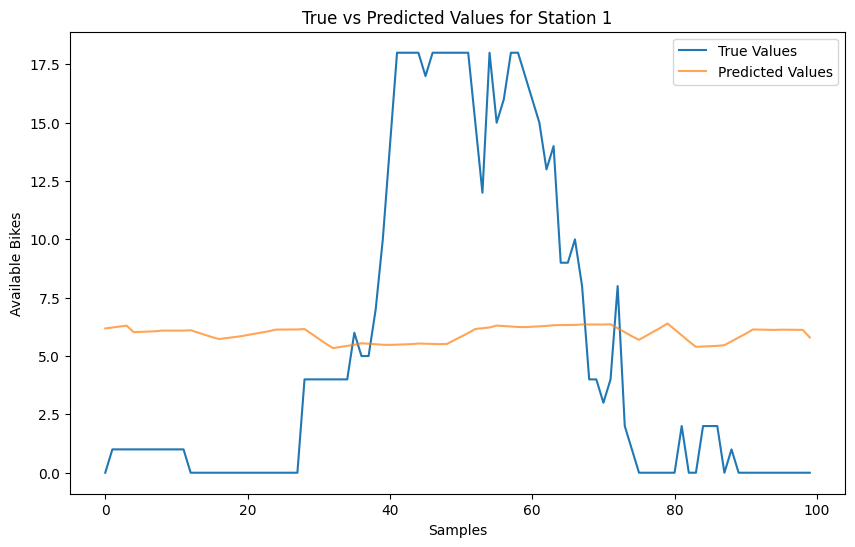

In [14]:
results_df = pd.DataFrame.from_dict(results_per_station, orient='index')
print(results_df)

station_to_plot = list(results_per_station.keys())[0]  
model_to_plot = models_per_station[station_to_plot]
group_to_plot = grouped.get_group(station_to_plot).sort_index()

X_test_to_plot = group_to_plot.iloc[int(len(group_to_plot) * 0.8):].drop(columns=['available_bikes', 'available_bike_stands']).values
X_test_to_plot = X_test_to_plot.reshape(X_test_to_plot.shape[0], 1, X_test_to_plot.shape[1])
y_test_to_plot = group_to_plot['available_bikes'].iloc[int(len(group_to_plot) * 0.8):].values

predictions_to_plot = model_to_plot.predict(X_test_to_plot)

plt.figure(figsize=(10, 6))
plt.plot(y_test_to_plot[:100], label='True Values')  # 前 100 个样本
plt.plot(predictions_to_plot[:100], label='Predicted Values', alpha=0.7)
plt.xlabel('Samples')
plt.ylabel('Available Bikes')
plt.legend()
plt.title(f'True vs Predicted Values for Station {station_to_plot}')
plt.show()